In [4]:
import pandas as pd
import matplotlib as plt

In [7]:
def steuerbetrag( zvE ):
    E_0, E_1, E_2, E_3 = 11604, 17005, 66760, 277825
    p, s, C = 0, 0, 0
    if E_1 >= zvE > E_0:
        p, s, C = 922.98E-8, 0.14, 0
        zvE -= E_0
    if E_2 >= zvE > E_1:
        p, s, C = 181.19E-8, 0.2397, 1025.38
        zvE -= E_1
    if E_3 >= zvE > E_2:
        p, s, C = 0, 0.42, -10602.13
    if zvE > E_3:
        p, s, C = 0, 0.45, 18936,88
    return zvE*(zvE*p + s) + C 

def durchschnittssteuersatz( zvE ):
    return steuerbetrag( zvE )/ zvE

def grenzsteuersatz( zvE ):
    epsilon = 0.01
    return (steuerbetrag( zvE + epsilon ) - steuerbetrag( zvE ))/epsilon

def nettogehalt_monat (zvE ):
    return ( zvE - steuerbetrag( zvE ) ) / 12

In [6]:
BRUTTO_2023 = 42684

JAHRES_EINKOMMEN_LVM = 63000

#abgeleitete einkommen

ALG1_GANZES_JAHR = BRUTTO_2023 * 0.8 * 0.6





In [8]:
brutto_jahreseinkommen_2024 = BRUTTO_2023 * 3 / 12 + ALG1_GANZES_JAHR * 8 / 12 + JAHRES_EINKOMMEN_LVM * 1 / 12
zvE_2024 = BRUTTO_2023 * 3 / 12 + JAHRES_EINKOMMEN_LVM / 12
steuersatz_2024 = durchschnittssteuersatz( brutto_jahreseinkommen_2024 )
steurbetrag_2024 = steuersatz_2024 * zvE_2024
steuereinzug_2024 = steuerbetrag( BRUTTO_2023 )*3/12 + steuerbetrag( JAHRES_EINKOMMEN_LVM)*1/12

In [77]:
steuereinzug_2024 - steurbetrag_2024

1089.019315073885

In [25]:
d = {
    "Netto": [nettogehalt_monat(BRUTTO_2023)]*3 + [1400]*8 + [nettogehalt_monat(JAHRES_EINKOMMEN_LVM)],
    "Brutto": [BRUTTO_2023/12]*3 + [1400]*8 + [JAHRES_EINKOMMEN_LVM/12]
}

<Axes: >

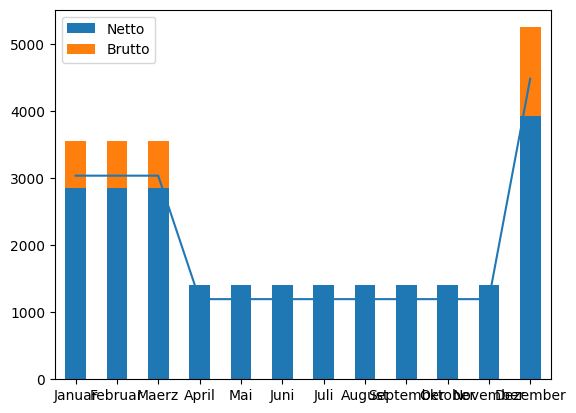

In [39]:
df = pd.DataFrame(data=d, columns=["Netto", "Brutto"], index=["Januar", "Februar", "Maerz", "April", "Mai", "Juni",
                            "Juli", "August", "September", "Oktober", "November", "Dezember"
                            ])
S = df["Brutto"].copy()
S *= (1 - steuersatz_2024)
df["Brutto"] -= df["Netto"]
ax = df.plot.bar(stacked=True)
S.plot()